In [1]:
# Section 1: Setup and Data Loading
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML
import sys
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sys.path.append('../src/data')
sys.path.append('../src/analysis')
from data_loader import load_and_prepare_data, regions # type: ignore
from metrics import calculate_metrics # type: ignore

# Reference to previous notebook
print("This analysis builds on the data loaded in '01_data_loading.ipynb'")
print("Analyzing healthcare spending patterns across US states for 2020")

This analysis builds on the data loaded in '01_data_loading.ipynb'
Analyzing healthcare spending patterns across US states for 2020


In [2]:
# Section 2: Load and Prepare Data
# Load and prepare the healthcare spending data for analysis
regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island',
                 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota',
                'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
              'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
              'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah',
             'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
}

# In case you did not view the previous notebook, here is a brief overview of the data:
df, state_data, us_average, regions = load_and_prepare_data()

# # Display basic information about the dataset
print("\nDataset Overview:")
print("-----------------")
print(f"Total number of records: {state_data.shape[0]}")
print(f"Number of features: {state_data.shape[1]}")

# Column information
print("\nColumn Details:")
print("--------------")
for column in state_data.columns:
    print(f"Column: {column}")
    print(f"Data type: {state_data[column].dtype}")
    print(f"Missing values: {state_data[column].isnull().sum()}")
    print()

# Quick summary statistics
print("\nQuick Summary:")
print("-------------")
print(state_data.describe().round(2))

# Display first few rows of the cleaned data
print("\nSample of Cleaned Data:")
print("--------------------")
display(state_data.head())

# Verify regions are correctly assigned
print("\nStates per Region:")
print("----------------")
print(state_data['Region'].value_counts())


Dataset Overview:
-----------------
Total number of records: 51
Number of features: 3

Column Details:
--------------
Column: Location
Data type: object
Missing values: 0

Column: Health Spending per Capita
Data type: float64
Missing values: 0

Column: Region
Data type: object
Missing values: 0


Quick Summary:
-------------
       Health Spending per Capita
count                       51.00
mean                     10477.08
std                       1633.65
min                       7522.00
25%                       9308.00
50%                      10212.00
75%                      11648.50
max                      14381.00

Sample of Cleaned Data:
--------------------


,Location,Health Spending per Capita,Region
1,Alabama,9280.0,South
2,Alaska,13642.0,West
3,Arizona,8756.0,West
4,Arkansas,9338.0,South
5,California,10299.0,West



States per Region:
----------------
Region
South        17
West         13
Midwest      12
Northeast     9
Name: count, dtype: int64



=== Basic Statistical Analysis ===

National Statistics:
------------------
US Average Spending: $10,191.00
Mean: $10,477.08
Median: $10,212.00
Standard Deviation: $1,633.65
Coefficient of Variation: 15.6%

Distribution Statistics:
----------------------
Skewness: 0.600
Kurtosis: -0.329

Percentile Analysis:
------------------
10th percentile: $8,756.00
25th percentile: $9,308.00
50th percentile: $10,212.00
75th percentile: $11,648.50
90th percentile: $12,769.00

Top 5 States by Healthcare Spending:
--------------------------------


,Location,Region,Health Spending per Capita
0,District of Columbia,South,14381.0
1,New York,Northeast,14007.0
2,Alaska,West,13642.0
3,Massachusetts,Northeast,13319.0
4,Delaware,South,12899.0



Bottom 5 States by Healthcare Spending:
-----------------------------------


,Location,Region,Health Spending per Capita
0,Utah,West,7522.0
1,Idaho,West,8148.0
2,Nevada,West,8348.0
3,Texas,South,8406.0
4,Colorado,West,8583.0



Basic Regional Metrics:
--------------------
 here is the region_data: 14    10190.0
15    10517.0
16     9789.0
17     9408.0
23     9897.0
24    10846.0
26     9921.0
28    10514.0
35    11301.0
36    10478.0
42    12495.0
50     9982.0
Name: Health Spending per Capita, dtype: float64
Region data above ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 here is the region_data: 1      9280.0
4      9338.0
8     12899.0
9     14381.0
10     9865.0
11     8758.0
18    10257.0
19    10515.0
21    10839.0
25     9394.0
34     8917.0
37     9444.0
41     8766.0
43     9336.0
44     8406.0
47     9195.0
49    12769.0
Name: Health Spending per Capita, dtype: float64
Region data above ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 here is the region_data: 2     13642.0
3      8756.0
5     10299.0
6      8583.0
12    10291.0
13     8148.0
27    10212.0
29     8348.0
32     8902.0
38    10071.0
45     7522.0
48     9265.0
51    10989.0
Name: Health Spending per Capita, dtype: float64
Region 

Health Spending per Capita                                   \
                                Mean      Std      Min      Max Count   
Region                                                                  
Midwest                     10444.83   823.91   9408.0  12495.0    12   
Northeast                   12400.67   825.46  11603.0  14007.0     9   
South                       10138.76  1686.19   8406.0  14381.0    17   
West                         9617.54  1585.49   7522.0  13642.0    13   

                         
          Pct Above Avg  
Region                   
Midwest       50.000000  
Northeast    100.000000  
South         35.294118  
West          38.461538

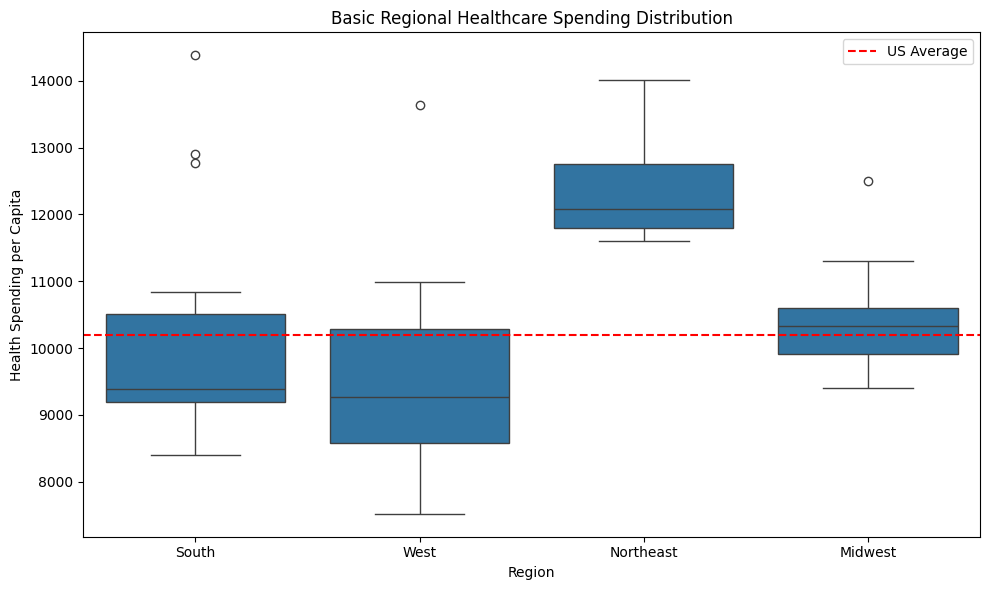

In [ ]:
# Section 3: Basic Statistical Analysis
print("\n=== Basic Statistical Analysis ===")

# 3.1 National Statistics
print("\nNational Statistics:")
print("------------------")
print(f"US Average Spending: ${us_average:,.2f}")
print(f"Mean: ${state_data['Health Spending per Capita'].mean():,.2f}")
print(f"Median: ${state_data['Health Spending per Capita'].median():,.2f}")
print(f"Standard Deviation: ${state_data['Health Spending per Capita'].std():,.2f}")
print(f"Coefficient of Variation: {(state_data['Health Spending per Capita'].std() / state_data['Health Spending per Capita'].mean() * 100):.1f}%")

# Distribution Statistics
print("\nDistribution Statistics:")
print("----------------------")
print(f"Skewness: {state_data['Health Spending per Capita'].skew():.3f}")
print(f"Kurtosis: {state_data['Health Spending per Capita'].kurtosis():.3f}")

# Percentile Analysis
print("\nPercentile Analysis:")
print("------------------")
percentiles = [10, 25, 50, 75, 90]
for p in percentiles:
    value = state_data['Health Spending per Capita'].quantile(p/100)
    print(f"{p}th percentile: ${value:,.2f}")

# 3.2 Top/Bottom States Analysis
print("\nTop 5 States by Healthcare Spending:")
print("--------------------------------")
display(state_data.nlargest(5, 'Health Spending per Capita')[['Location', 'Region', 'Health Spending per Capita']].reset_index(drop=True))

print("\nBottom 5 States by Healthcare Spending:")
print("-----------------------------------")
display(state_data.nsmallest(5, 'Health Spending per Capita')[['Location', 'Region', 'Health Spending per Capita']].reset_index(drop=True))

# 3.3 Basic Regional Metrics
print("\nBasic Regional Metrics:")
print("--------------------")
regional_metrics = state_data.groupby('Region').agg({
    'Health Spending per Capita': [
        ('Mean', 'mean'),
        ('Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Count', 'count')
    ]
}).round(2)

# Calculate percentage above national average for each region
for region in state_data['Region'].unique():
    region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
    print(f" here is the region_data: {region_data}")
    print("Region data above ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    pct_above = (region_data > us_average).mean() * 100
    regional_metrics.loc[region, ('Health Spending per Capita', 'Pct Above Avg')] = pct_above

display(regional_metrics)

# Basic visualization of regional distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Basic Regional Healthcare Spending Distribution')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


=== Regional Analysis ===

Comprehensive Regional Statistics:
-------------------------------


,Mean,Variance,States,Pct Above Avg
Region,,,,
Midwest,10444.83,678822.70,12,50.000000
Northeast,12400.67,681388.75,9,100.000000
South,10138.76,2843236.19,17,35.294118
West,9617.54,2513791.60,13,38.461538



Regional Comparisons to National Average:
-------------------------------------

Location Region:
Mean spending: $nan
nan% below national average
Number of states: 0

Health Spending per Capita Region:
Mean spending: $nan
nan% below national average
Number of states: 0


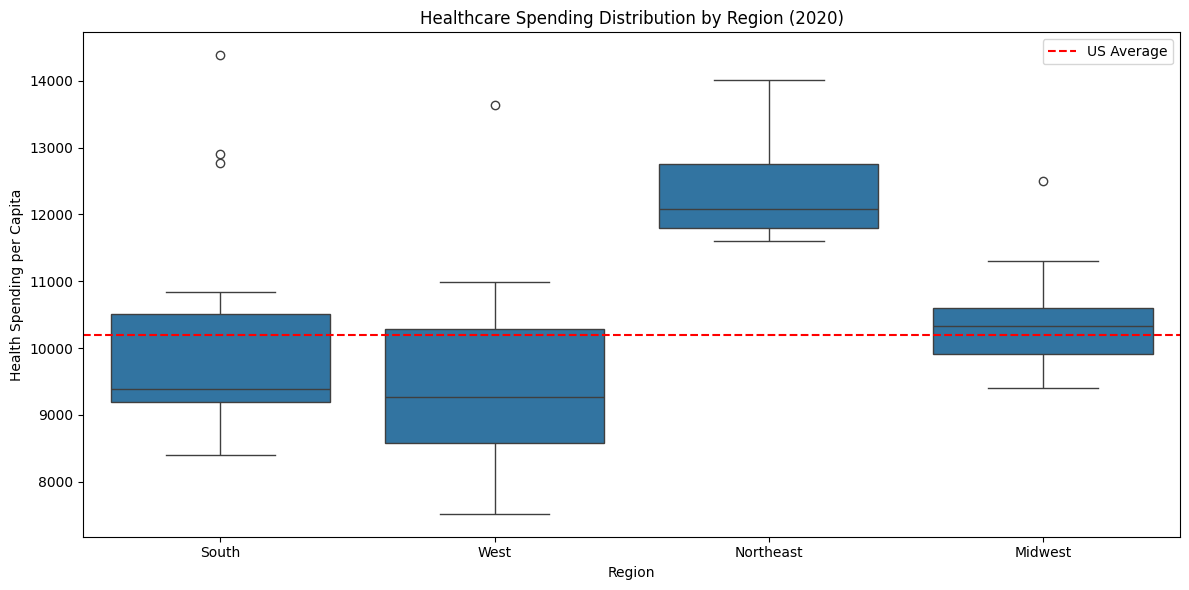

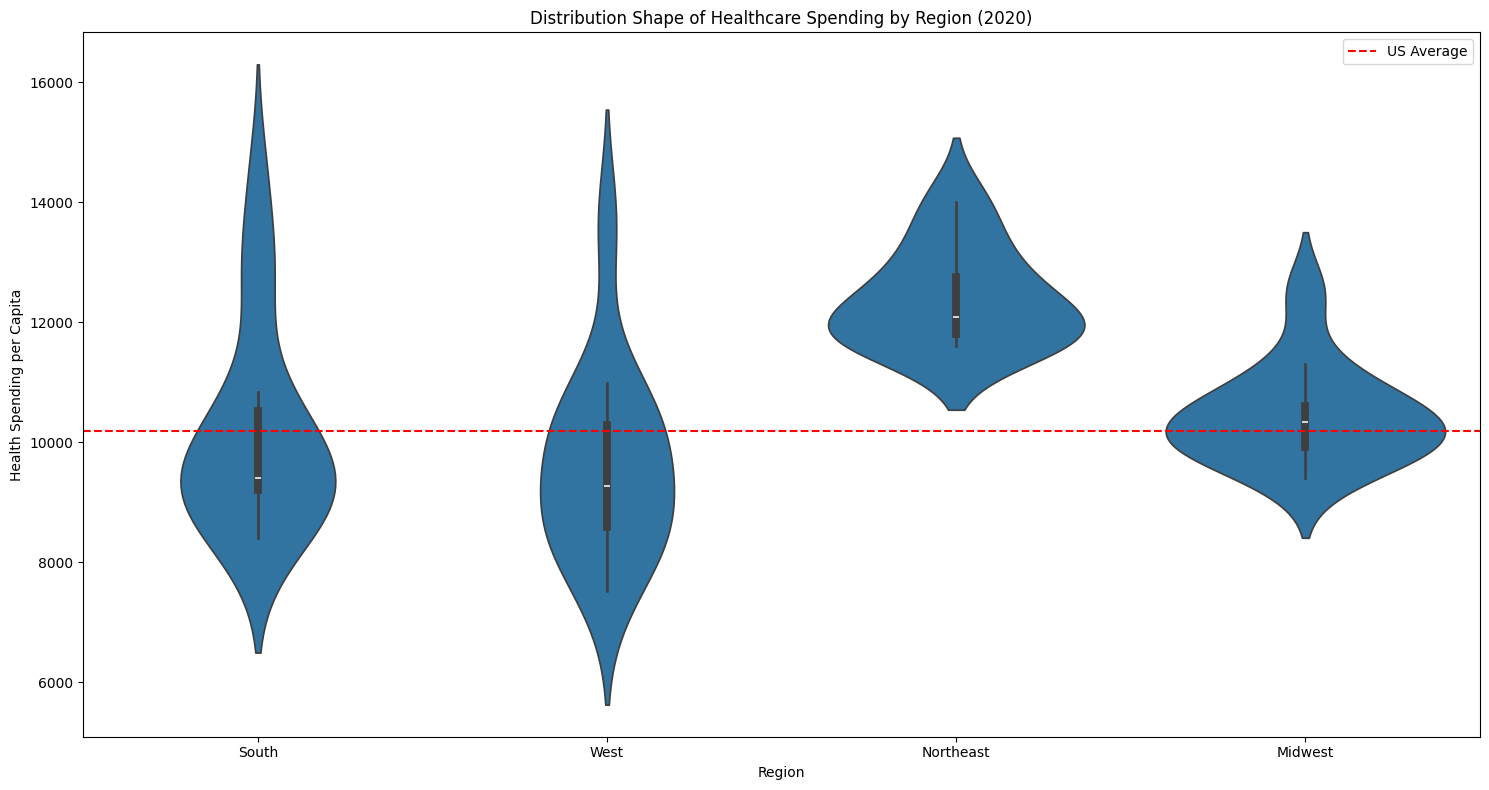


Regional Variance Analysis:
------------------------

Location Region:
Variance: $nan
Standard Deviation: $nan
Coefficient of Variation: nan%

Health Spending per Capita Region:
Variance: $nan
Standard Deviation: $nan
Coefficient of Variation: nan%

Detailed State-by-State Analysis by Region:
---------------------------------------

Location Region Analysis:
--------------------------------------------------
Number of States: 0
Mean Spending: $nan
Median Spending: $nan
Standard Deviation: $nan
Range: $nan
Skewness: nan

States in region (ordered by spending):


ZeroDivisionError: division by zero

In [4]:
# Section 4: Regional Analysis
print("\n=== Regional Analysis ===")

# 4.1 Comprehensive Regional Statistics
print("\nComprehensive Regional Statistics:")
print("-------------------------------")
region_overview = state_data.groupby('Region').agg({
   'Health Spending per Capita': [
       ('Mean', 'mean'),
       ('Variance', 'var'),
       ('States', 'size')
   ]
}).round(2)

# Add percentage above/below national average
for region in state_data['Region'].unique():
   region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
   pct_above = (region_data > us_average).mean() * 100
   region_overview.loc[region, ('Health Spending per Capita', 'Pct Above Avg')] = pct_above

region_overview.columns = region_overview.columns.droplevel(0)
display(region_overview)

# 4.2 Regional Comparisons to National Average
print("\nRegional Comparisons to National Average:")
print("-------------------------------------")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region].copy()
   mean_spending = region_data['Health Spending per Capita'].mean()
   diff_from_natl = ((mean_spending - us_average) / us_average * 100)
   
   print(f"\n{region} Region:")
   print(f"Mean spending: ${mean_spending:,.2f}")
   print(f"{abs(diff_from_natl):.1f}% {'above' if diff_from_natl > 0 else 'below'} national average")
   print(f"Number of states: {len(region_data)}")

# 4.3 Box Plot Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Healthcare Spending Distribution by Region (2020)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# 4.4 Violin Plot Analysis
plt.figure(figsize=(15, 8))
sns.violinplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Distribution Shape of Healthcare Spending by Region (2020)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# 4.5 Regional Variance Analysis
print("\nRegional Variance Analysis:")
print("------------------------")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
   print(f"\n{region} Region:")
   print(f"Variance: ${region_data.var():,.2f}")
   print(f"Standard Deviation: ${region_data.std():,.2f}")
   print(f"Coefficient of Variation: {(region_data.std() / region_data.mean() * 100):.1f}%")

# 4.6 Detailed State-by-State Breakdown
print("\nDetailed State-by-State Analysis by Region:")
print("---------------------------------------")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region].copy()
   
   print(f"\n{region} Region Analysis:")
   print("-" * 50)
   print(f"Number of States: {len(region_data)}")
   print(f"Mean Spending: ${region_data['Health Spending per Capita'].mean():,.2f}")
   print(f"Median Spending: ${region_data['Health Spending per Capita'].median():,.2f}")
   print(f"Standard Deviation: ${region_data['Health Spending per Capita'].std():,.2f}")
   print(f"Range: ${region_data['Health Spending per Capita'].max() - region_data['Health Spending per Capita'].min():,.2f}")
   print(f"Skewness: {region_data['Health Spending per Capita'].skew():,.3f}")
   
   print("\nStates in region (ordered by spending):")
   region_states = region_data.sort_values('Health Spending per Capita', ascending=False)
   for _, row in region_states.iterrows():
       print(f"{row['Location']}: ${row['Health Spending per Capita']:,.2f}")

   # Calculate percentage of states above/below national average
   above_avg = sum(region_data['Health Spending per Capita'] > us_average)
   total_states = len(region_data)
   print(f"\nStates above national average: {above_avg} ({(above_avg/total_states*100):.1f}%)")

In [ ]:
# Section 5: Distribution Analysis
print("\n=== Distribution Analysis ===")

# 5.1 Overall Distribution Visualization
# Create figure with two subplots for distribution analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Histogram with KDE
sns.histplot(
   data=state_data,
   x='Health Spending per Capita',
   kde=True,
   ax=ax1,
   bins=15,
   color='skyblue'
)
ax1.axvline(x=us_average, color='red', linestyle='--', label=f'US Average (${us_average:,.0f})')
ax1.set_title('Healthcare Spending Distribution with Density Estimation')
ax1.set_xlabel('Healthcare Spending per Capita ($)')
ax1.set_ylabel('Count of States')
ax1.legend()

# Regional KDE comparison
sns.kdeplot(
   data=state_data,
   x='Health Spending per Capita',
   hue='Region',
   ax=ax2,
   fill=True,
   alpha=0.5
)
ax2.axvline(x=us_average, color='red', linestyle='--', label=f'US Average (${us_average:,.0f})')
ax2.set_title('Healthcare Spending Density by Region')
ax2.set_xlabel('Healthcare Spending per Capita ($)')
ax2.set_ylabel('Density')
ax2.legend(title='Region')

plt.tight_layout()
plt.show()

# 5.2 Distribution Statistics and Normality Testing
print("\nDistribution Statistics:")
print("=====================")
print(f"Mean: ${state_data['Health Spending per Capita'].mean():,.2f}")
print(f"Median: ${state_data['Health Spending per Capita'].median():,.2f}")
print(f"Standard Deviation: ${state_data['Health Spending per Capita'].std():,.2f}")
print(f"Skewness: {state_data['Health Spending per Capita'].skew():.3f}")
print(f"Kurtosis: {state_data['Health Spending per Capita'].kurtosis():.3f}")

# Normality Test
_, p_value = stats.normaltest(state_data['Health Spending per Capita'])
print(f"\nNormality Test p-value: {p_value:.4f}")
print("Distribution is", "normal" if p_value > 0.05 else "non-normal", "at 5% significance level")

# 5.3 Outlier Detection
print("\nOutlier Analysis:")
print("===============")
Q1 = state_data['Health Spending per Capita'].quantile(0.25)
Q3 = state_data['Health Spending per Capita'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = state_data[
   (state_data['Health Spending per Capita'] < lower_bound) |
   (state_data['Health Spending per Capita'] > upper_bound)
]

print("\nPotential Outliers (beyond 1.5 IQR):")
for _, row in outliers.iterrows():
   print(f"{row['Location']}: ${row['Health Spending per Capita']:,.2f}")

# 5.4 Percentile Analysis
print("\nPercentile Analysis:")
print("==================")
percentiles = [10, 25, 50, 75, 90]
for p in percentiles:
   value = state_data['Health Spending per Capita'].quantile(p/100)
   print(f"{p}th percentile: ${value:,.2f}")

# 5.5 Regional Distribution Comparison
print("\nRegional Distribution Comparison:")
print("==============================")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
   print(f"\n{region} Region:")
   print(f"Mean: ${region_data.mean():,.2f}")
   print(f"Median: ${region_data.median():,.2f}")
   print(f"Std Dev: ${region_data.std():,.2f}")
   print(f"Skewness: {region_data.skew():.3f}")
   print(f"Kurtosis: {region_data.kurtosis():.3f}")

In [ ]:
# Section 6: Comparative Analysis
print("\n=== Comparative Analysis ===")

# 6.1 State Rankings Visualization
plt.figure(figsize=(15, 8))
sns.barplot(data=state_data.sort_values('Health Spending per Capita', ascending=True),
           x='Location',
           y='Health Spending per Capita',
           hue='Region',
           legend=True)
plt.axhline(y=us_average, color='black', linestyle='--', label='US Average')
plt.xticks(rotation=45, ha='right')
plt.title('Healthcare Spending by State and Region (2020)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6.2 Distance from National Average Analysis
# Calculate raw and percentage differences
state_data['Difference_from_US_Avg'] = state_data['Health Spending per Capita'] - us_average
state_data['Percent_Difference'] = (state_data['Difference_from_US_Avg'] / us_average * 100).round(1)

print("\nStates Relative to US Average:")
print(f"States Above Average: {sum(state_data['Health Spending per Capita'] > us_average)}")
print(f"States Below Average: {sum(state_data['Health Spending per Capita'] < us_average)}")

print("\nMost Extreme Differences from US Average:")
print("\nHighest above average:")
display(state_data.nlargest(3, 'Percent_Difference')[['Location', 'Region', 'Percent_Difference']].reset_index(drop=True))

print("\nLowest below average:")
display(state_data.nsmallest(3, 'Percent_Difference')[['Location', 'Region', 'Percent_Difference']].reset_index(drop=True))

# 6.3 Percentage Difference Visualization
# Create categories for difference from average
state_data['Difference_Category'] = pd.cut(state_data['Percent_Difference'],
                                        bins=[-float('inf'), -20, -10, 0, 10, 20, float('inf')],
                                        labels=['Very Low', 'Low', 'Near Average (Lower)',
                                               'Near Average (Higher)', 'High', 'Very High'])

plt.figure(figsize=(15, 6))
sns.barplot(data=state_data.sort_values('Percent_Difference'),
           x='Location',
           y='Percent_Difference',
           hue='Region')
plt.axhline(y=0, color='r', linestyle='--', label='National Average')
plt.title('Percentage Difference from National Average by State')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# 6.4 Neighbor Analysis
print("\nNeighbor Analysis:")
print("================")
# Define state neighbors
state_neighbors = {
   'New York': ['Connecticut', 'Massachusetts', 'Vermont', 'New Jersey', 'Pennsylvania'],
   'California': ['Oregon', 'Nevada', 'Arizona'],
   'Texas': ['New Mexico', 'Oklahoma', 'Arkansas', 'Louisiana'],
   'Florida': ['Georgia', 'Alabama'],
   'Illinois': ['Wisconsin', 'Indiana', 'Kentucky', 'Missouri', 'Iowa']
}

# Calculate differences with neighbors
for state, neighbors in state_neighbors.items():
   state_spending = state_data[state_data['Location'] == state]['Health Spending per Capita'].values[0]
   neighbor_spending = state_data[state_data['Location'].isin(neighbors)]['Health Spending per Capita'].mean()
   diff_from_neighbors = ((state_spending - neighbor_spending) / neighbor_spending * 100).round(1)
   print(f"\n{state}:")
   print(f"State Spending: ${state_spending:,.2f}")
   print(f"Average Neighbor Spending: ${neighbor_spending:,.2f}")
   print(f"Difference from Neighbors: {diff_from_neighbors}%")

# 6.5 Regional Patterns and Trends
print("\nRegional Patterns and Trends:")
print("==========================")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region]
   
   print(f"\n{region} Region Patterns:")
   print("-" * 30)
   print(f"Average spending: ${region_data['Health Spending per Capita'].mean():,.2f}")
   print(f"Spending range: ${region_data['Health Spending per Capita'].max() - region_data['Health Spending per Capita'].min():,.2f}")
   print(f"States above national average: {sum(region_data['Health Spending per Capita'] > us_average)}/{len(region_data)}")
   
   # Calculate regional trend metrics
   above_avg_pct = (sum(region_data['Health Spending per Capita'] > us_average) / len(region_data) * 100)
   region_variance = region_data['Health Spending per Capita'].var()
   
   print(f"Percentage of states above average: {above_avg_pct:.1f}%")
   print(f"Regional variance: ${region_variance:,.2f}")

In [ ]:
# Section 7: Advanced Statistical Analysis
print("\n=== Advanced Statistical Analysis ===")

# 7.1 ANOVA Testing
# Prepare data for ANOVA
anova_data = state_data[['Health Spending per Capita', 'Region']]

# Perform ANOVA
model = sm.formula.ols('Q("Health Spending per Capita") ~ Region', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Results:")
print("=============")
print(anova_table)

# 7.2 Tukey's HSD Post-hoc Analysis
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=anova_data['Health Spending per Capita'],
                        groups=anova_data['Region'],
                        alpha=0.05)

print("\nTukey's HSD Post-hoc Test Results:")
print("================================")
print(tukey)

# Visualize Tukey's HSD results
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.title("Tukey's HSD: Confidence Intervals by Region")
plt.xlabel('Healthcare Spending per Capita ($)')
plt.tight_layout()
plt.show()

# 7.3 Variance Components Analysis
print("\nVariance Components Analysis:")
print("==========================")
# Calculate overall variance metrics
total_variance = state_data['Health Spending per Capita'].var()
regional_means = state_data.groupby('Region')['Health Spending per Capita'].mean()
overall_mean = state_data['Health Spending per Capita'].mean()

# Between-region variance
between_region_var = sum([(mean - overall_mean) ** 2 for mean in regional_means]) * len(state_data) / (len(regional_means) - 1)

# Within-region variance
within_region_var = sum((state_data.groupby('Region')['Health Spending per Capita'].var() * 
                       (state_data.groupby('Region').size() - 1)).sum()) / (len(state_data) - len(regional_means))

print(f"Total Variance: ${total_variance:,.2f}")
print(f"Between-Region Variance: ${between_region_var:,.2f}")
print(f"Within-Region Variance: ${within_region_var:,.2f}")
print(f"Percentage of variance explained by regional differences: {(between_region_var/total_variance*100):.1f}%")

# 7.4 Statistical Significance Testing
print("\nStatistical Significance Testing:")
print("==============================")

# T-tests comparing each region to national average
print("\nOne-sample t-tests (comparing to national average):")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
   t_stat, p_val = stats.ttest_1samp(region_data, us_average)
   print(f"\n{region} Region:")
   print(f"T-statistic: {t_stat:.3f}")
   print(f"P-value: {p_val:.4f}")
   print("Conclusion:", "Significantly different from national average" if p_val < 0.05 else "Not significantly different from national average")

# Levene's test for homogeneity of variances
_, levene_p = stats.levene(*[group['Health Spending per Capita'].values 
                           for name, group in state_data.groupby('Region')])
print("\nLevene's Test for Homogeneity of Variances:")
print(f"P-value: {levene_p:.4f}")
print("Conclusion:", "Variances are significantly different" if levene_p < 0.05 else "Variances are not significantly different")

# Effect size calculation (Eta-squared)
ss_between = sum((state_data.groupby('Region')['Health Spending per Capita'].mean() - 
                state_data['Health Spending per Capita'].mean()) ** 2)
ss_total = sum((state_data['Health Spending per Capita'] - 
               state_data['Health Spending per Capita'].mean()) ** 2)
eta_squared = ss_between / ss_total

print("\nEffect Size Analysis:")
print(f"Eta-squared: {eta_squared:.3f}")
print("Interpretation:", 
     "Large effect" if eta_squared > 0.14 else
     "Medium effect" if eta_squared > 0.06 else
     "Small effect")

In [ ]:
# Section 8: Visualization Suite
print("\n=== Visualization Suite ===")

# 8.1 Regional Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Healthcare Spending Distribution by Region (2020)')
plt.xlabel('Region')
plt.ylabel('Healthcare Spending per Capita ($)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# 8.2 State Rankings Bar Chart
plt.figure(figsize=(15, 8))
sns.barplot(data=state_data.sort_values('Health Spending per Capita', ascending=True),
           x='Location',
           y='Health Spending per Capita',
           hue='Region',
           legend=True)
plt.axhline(y=us_average, color='black', linestyle='--', label='US Average')
plt.xticks(rotation=45, ha='right')
plt.title('Healthcare Spending by State and Region (2020)')
plt.xlabel('State')
plt.ylabel('Healthcare Spending per Capita ($)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 8.3 Distribution Histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Overall Distribution
sns.histplot(data=state_data,
           x='Health Spending per Capita',
           kde=True,
           ax=ax1,
           bins=15,
           color='skyblue')
ax1.axvline(x=us_average, color='red', linestyle='--', label=f'US Average (${us_average:,.0f})')
ax1.set_title('Overall Healthcare Spending Distribution')
ax1.set_xlabel('Healthcare Spending per Capita ($)')
ax1.set_ylabel('Count of States')
ax1.legend()

# Regional Distribution Comparison
sns.kdeplot(data=state_data,
           x='Health Spending per Capita',
           hue='Region',
           ax=ax2,
           fill=True,
           alpha=0.5)
ax2.axvline(x=us_average, color='red', linestyle='--', label=f'US Average (${us_average:,.0f})')
ax2.set_title('Healthcare Spending Distribution by Region')
ax2.set_xlabel('Healthcare Spending per Capita ($)')
ax2.set_ylabel('Density')
ax2.legend(title='Region')

plt.tight_layout()
plt.show()

# 8.4 Regional Violin Plots
plt.figure(figsize=(15, 8))
sns.violinplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Distribution Shape of Healthcare Spending by Region (2020)')
plt.xlabel('Region')
plt.ylabel('Healthcare Spending per Capita ($)')
plt.legend()
plt.tight_layout()
plt.show()

# 8.5 Comparative Bar Charts (Percentage Difference from National Average)
plt.figure(figsize=(15, 6))
sns.barplot(data=state_data.sort_values('Percent_Difference'),
           x='Location',
           y='Percent_Difference',
           hue='Region')
plt.axhline(y=0, color='r', linestyle='--', label='National Average')
plt.title('Percentage Difference from National Average by State')
plt.xlabel('State')
plt.ylabel('Percentage Difference from National Average (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# 8.6 Tukey's HSD Visualization
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=state_data['Health Spending per Capita'],
                        groups=state_data['Region'],
                        alpha=0.05)

plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.title("Tukey's HSD: Regional Healthcare Spending Comparisons")
plt.xlabel('Healthcare Spending per Capita ($)')
plt.tight_layout()
plt.show()

In [ ]:
# Section 9: Findings and Conclusions
print("\n=== Findings and Conclusions ===")

# 9.1 Key Takeaways
print("\nKey Takeaways:")
print("=============")
# Calculate overall statistics for summary
mean_spending = state_data['Health Spending per Capita'].mean()
median_spending = state_data['Health Spending per Capita'].median()
std_spending = state_data['Health Spending per Capita'].std()

print(f"1. Overall Healthcare Spending:")
print(f"   - National Average: ${us_average:,.2f}")
print(f"   - Mean State Spending: ${mean_spending:,.2f}")
print(f"   - Median State Spending: ${median_spending:,.2f}")
print(f"   - Standard Deviation: ${std_spending:,.2f}")

# High and low states
highest_state = state_data.loc[state_data['Health Spending per Capita'].idxmax()]
lowest_state = state_data.loc[state_data['Health Spending per Capita'].idxmin()]
print(f"\n2. Spending Range:")
print(f"   - Highest: {highest_state['Location']} (${highest_state['Health Spending per Capita']:,.2f})")
print(f"   - Lowest: {lowest_state['Location']} (${lowest_state['Health Spending per Capita']:,.2f})")
print(f"   - Range: ${highest_state['Health Spending per Capita'] - lowest_state['Health Spending per Capita']:,.2f}")

# 9.2 Regional Insights
print("\nRegional Insights:")
print("================")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region]
   mean_regional = region_data['Health Spending per Capita'].mean()
   diff_from_natl = ((mean_regional - us_average) / us_average * 100)
   
   print(f"\n{region} Region:")
   print(f"- Average Spending: ${mean_regional:,.2f}")
   print(f"- {abs(diff_from_natl):.1f}% {'above' if diff_from_natl > 0 else 'below'} national average")
   print(f"- States above national average: {sum(region_data['Health Spending per Capita'] > us_average)}/{len(region_data)}")

# 9.3 Statistical Significance Summary
print("\nStatistical Significance Summary:")
print("==============================")
# ANOVA summary
model = sm.formula.ols('Q("Health Spending per Capita") ~ Region', data=state_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f"ANOVA Results:")
print(f"- F-statistic: {anova_table['F'][0]:.3f}")
print(f"- p-value: {anova_table['PR(>F)'][0]:.4f}")

# Effect size
ss_between = sum((state_data.groupby('Region')['Health Spending per Capita'].mean() - 
                state_data['Health Spending per Capita'].mean()) ** 2)
ss_total = sum((state_data['Health Spending per Capita'] - 
               state_data['Health Spending per Capita'].mean()) ** 2)
eta_squared = ss_between / ss_total
print(f"\nEffect Size:")
print(f"- Eta-squared: {eta_squared:.3f}")

# 9.4 Hypothesis Testing Results
print("\nHypothesis Testing Results:")
print("=========================")
print("H0: No significant difference in healthcare spending across regions")
print("H1: Regional factors significantly influence healthcare spending")
print(f"\nConclusion: {('Reject H0' if anova_table['PR(>F)'][0] < 0.05 else 'Fail to reject H0')}")
print(f"Evidence suggests {'significant' if anova_table['PR(>F)'][0] < 0.05 else 'no significant'} differences between regions")

# 9.5 Identified Patterns and Trends
print("\nIdentified Patterns and Trends:")
print("============================")

# Regional patterns
print("\n1. Regional Hierarchy:")
regional_means = state_data.groupby('Region')['Health Spending per Capita'].mean().sort_values(ascending=False)
for region, mean in regional_means.items():
   print(f"   - {region}: ${mean:,.2f}")

# Variance analysis
print("\n2. Variability Patterns:")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
   cv = (region_data.std() / region_data.mean()) * 100
   print(f"   - {region} CV: {cv:.1f}%")

# Distribution characteristics
print("\n3. Distribution Characteristics:")
print(f"   - Skewness: {state_data['Health Spending per Capita'].skew():.3f}")
print(f"   - Kurtosis: {state_data['Health Spending per Capita'].kurtosis():.3f}")
print(f"   - Distribution is {'normal' if stats.normaltest(state_data['Health Spending per Capita'])[1] > 0.05 else 'non-normal'}")

print("\n4. Key Trends:")
print("   - Percentage of states above national average:", 
     f"{(sum(state_data['Health Spending per Capita'] > us_average) / len(state_data) * 100):.1f}%")
print("   - Regional spending disparity:",
     f"${regional_means.max() - regional_means.min():,.2f}")

In [ ]:

# Section 10: Appendix
print("\n=== Appendix ===")

# 10.1 Data Preparation Details
print("\nData Preparation Details:")
print("=======================")
# Document the data loading process
print("Data Loading Process:")
print("1. Source: Kaiser Family Foundation (KFF) Healthcare Spending per Capita (2020)")
print("2. Initial columns:", df.columns.tolist())
print("3. Records processed:", len(df))
print("\nData Cleaning Steps:")
print("- Converting spending values to numeric format")
print("- Adding region classifications")
print("- Separating state-level data from US average")

# Display data info
print("\nDataset Information:")
print(state_data.info())

# Check for missing values
print("\nMissing Value Analysis:")
print(state_data.isnull().sum())

# 10.2 Methodological Notes
print("\nMethodological Notes:")
print("===================")
print("Statistical Methods Applied:")
print("1. Descriptive Statistics")
print("   - Measures of central tendency")
print("   - Variability metrics")
print("   - Distribution characteristics")
print("\n2. Inferential Statistics")
print("   - ANOVA testing")
print("   - Tukey's HSD post-hoc analysis")
print("   - T-tests against national average")
print("\n3. Distribution Analysis")
print("   - Normality testing")
print("   - Outlier detection using IQR")
print("\n4. Visualization Techniques")
print("   - Box plots and violin plots")
print("   - Histograms with KDE")
print("   - Bar charts and rankings")

# 10.3 Additional Visualizations
# Correlation matrix (if additional variables were available)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=state_data, 
               x='Health Spending per Capita',
               y='Percent_Difference',
               hue='Region',
               style='Region')
plt.title('Healthcare Spending vs Percentage Difference from National Average')
plt.xlabel('Health Spending per Capita ($)')
plt.ylabel('Percentage Difference from National Average (%)')
plt.tight_layout()
plt.show()

# Distribution by spending category
plt.figure(figsize=(12, 6))
sns.countplot(data=state_data, x='Difference_Category', hue='Region')
plt.title('Distribution of States by Spending Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10.4 Supplementary Analyses
print("\nSupplementary Analyses:")
print("=====================")

# Additional regional statistics
print("\nDetailed Regional Statistics:")
supplementary_stats = state_data.groupby('Region').agg({
   'Health Spending per Capita': [
       ('Count', 'count'),
       ('Mean', 'mean'),
       ('Median', 'median'),
       ('Std', 'std'),
       ('CV', lambda x: x.std() / x.mean() * 100),
       ('Skew', 'skew'),
       ('Kurt', 'kurtosis')
   ]
}).round(2)

display(supplementary_stats)

# Quartile analysis
print("\nQuartile Analysis by Region:")
for region in regions.keys():
   region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
   q1, q2, q3 = region_data.quantile([0.25, 0.5, 0.75])
   print(f"\n{region} Region:")
   print(f"Q1: ${q1:,.2f}")
   print(f"Q2 (Median): ${q2:,.2f}")
   print(f"Q3: ${q3:,.2f}")
   print(f"IQR: ${q3-q1:,.2f}")

# Distance matrix between regional means
print("\nRegional Mean Distance Matrix:")
regional_means = state_data.groupby('Region')['Health Spending per Capita'].mean()
distance_matrix = pd.DataFrame(index=regions.keys(), columns=regions.keys())
for r1 in regions.keys():
   for r2 in regions.keys():
       distance_matrix.loc[r1, r2] = abs(regional_means[r1] - regional_means[r2])
       
display(distance_matrix.round(2))